In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from collections import Counter

In [2]:
# import initial datasets
# https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation
df_test = pd.read_csv(r'C:\GitHub\DSC680\Project 1\Datasets\Kaggle_kaushiksuresh147\Test.csv')
df_train = pd.read_csv(r'C:\GitHub\DSC680\Project 1\Datasets\Kaggle_kaushiksuresh147\Train.csv')

In [3]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
df_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [5]:
# df_test information

print('df_test shape: \n', df_test.shape, '\n')
print('df_test.describe: \n', df_test.describe(), '\n\n', 'df_test.info: \n')
print(df_test.info(), '\n')
print('df_test null: \n', df_test.isnull().sum(), '\n')
print('df_test unique: \n', df_test.nunique())

df_test shape: 
 (2627, 11) 

df_test.describe: 
                   ID          Age  Work_Experience  Family_Size
count    2627.000000  2627.000000      2358.000000  2514.000000
mean   463433.918919    43.649791         2.552587     2.825378
std      2618.245698    16.967015         3.341094     1.551906
min    458989.000000    18.000000         0.000000     1.000000
25%    461162.500000    30.000000         0.000000     2.000000
50%    463379.000000    41.000000         1.000000     2.000000
75%    465696.000000    53.000000         4.000000     4.000000
max    467968.000000    89.000000        14.000000     9.000000 

 df_test.info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age          

In [6]:
# df_train information

print('df_train shape: \n', df_train.shape, '\n')
print('df_train.describe: \n', df_train.describe(), '\n\n', 'df_train.info: \n')
print(df_train.info(), '\n')
print('df_train null: \n', df_train.isnull().sum(), '\n')
print('df_train unique: \n', df_train.nunique())

df_train shape: 
 (8068, 11) 

df_train.describe: 
                   ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      7239.000000  7733.000000
mean   463479.214551    43.466906         2.641663     2.850123
std      2595.381232    16.711696         3.406763     1.531413
min    458982.000000    18.000000         0.000000     1.000000
25%    461240.750000    30.000000         0.000000     2.000000
50%    463472.500000    40.000000         1.000000     3.000000
75%    465744.250000    53.000000         4.000000     4.000000
max    467974.000000    89.000000        14.000000     9.000000 

 df_train.info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age       

In [7]:
# drop inapplicable cols: train
df_train.drop(columns = 'Var_1', inplace = True)
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


In [8]:
# handle null data: train

# fill null object data (see df_train.info) with most common response
object_col = df_train.select_dtypes(include = 'object').columns

for column in object_col:
    df_train[column].fillna(df_train[column].mode()[0], inplace = True)

# fill null float64
float_col = df_train.select_dtypes(include = 'float64').columns

for column in float_col:
    df_train[column].fillna(df_train[column].mean(), inplace = True)

# no null int64 data

In [9]:
# vew cleaned training data: train
print('df_train shape: \n', df_train.shape, '\n')
print('df_train.describe: \n', df_train.describe(), '\n\n', 'df_train.info: \n')
print(df_train.info(), '\n')
print('df_train null: \n', df_train.isnull().sum(), '\n')
print('df_train unique: \n', df_train.nunique())

df_train shape: 
 (8068, 10) 

df_train.describe: 
                   ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      8068.000000  8068.000000
mean   463479.214551    43.466906         2.641663     2.850123
std      2595.381232    16.711696         3.226972     1.499278
min    458982.000000    18.000000         0.000000     1.000000
25%    461240.750000    30.000000         0.000000     2.000000
50%    463472.500000    40.000000         1.000000     2.850123
75%    465744.250000    53.000000         4.000000     4.000000
max    467974.000000    89.000000        14.000000     9.000000 

 df_train.info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age       

In [10]:
# handle non-numeric data: train
labelencoder = LabelEncoder()

for column in object_col:
    df_train[column] = labelencoder.fit_transform(df_train[column])

In [11]:
# view cleaned training df
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,1,0,22,0,5,1.000000,2,4.0,3
1,462643,0,1,38,1,2,2.641663,0,3.0,0
2,466315,0,1,67,1,2,1.000000,2,1.0,1
3,461735,1,1,67,1,7,0.000000,1,2.0,1
4,462669,0,1,40,1,3,2.641663,1,6.0,0


In [12]:
# vew cleaned training data info
print('df_train shape: \n', df_train.shape, '\n')
print('df_train.describe: \n', df_train.describe(), '\n\n', 'df_train.info: \n')
print(df_train.info(), '\n')
print('df_train null: \n', df_train.isnull().sum(), '\n')
print('df_train unique: \n', df_train.nunique())

df_train shape: 
 (8068, 10) 

df_train.describe: 
                   ID       Gender  Ever_Married          Age    Graduated  \
count    8068.000000  8068.000000   8068.000000  8068.000000  8068.000000   
mean   463479.214551     0.547471      0.592836    43.466906     0.625434   
std      2595.381232     0.497772      0.491336    16.711696     0.484041   
min    458982.000000     0.000000      0.000000    18.000000     0.000000   
25%    461240.750000     0.000000      0.000000    30.000000     0.000000   
50%    463472.500000     1.000000      1.000000    40.000000     1.000000   
75%    465744.250000     1.000000      1.000000    53.000000     1.000000   
max    467974.000000     1.000000      1.000000    89.000000     1.000000   

        Profession  Work_Experience  Spending_Score  Family_Size  Segmentation  
count  8068.000000      8068.000000     8068.000000  8068.000000   8068.000000  
mean      2.746901         2.641663        1.359941     2.850123      1.561973  
std       2

In [13]:
df_model = df_train

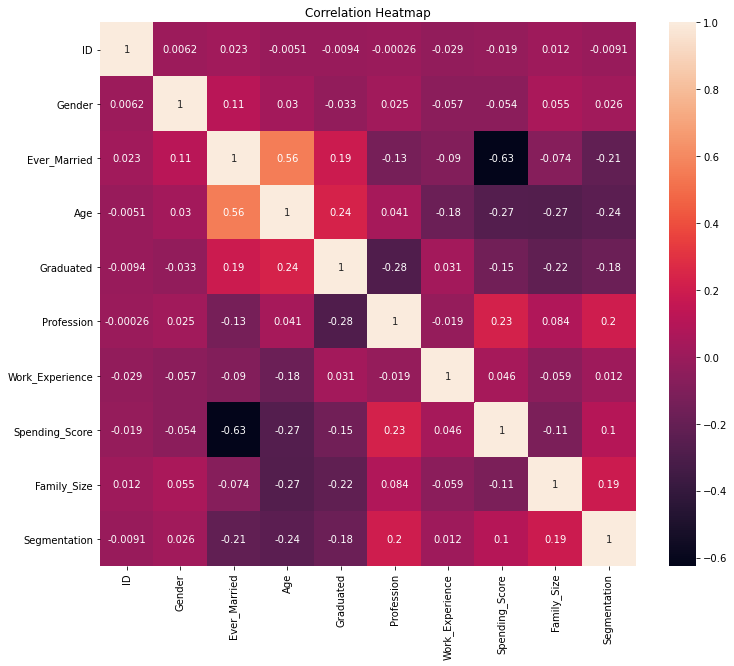

In [14]:
# view heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(df_model.corr(), annot = True)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# scale data
ss = StandardScaler()
col_to_scale = ['ID',
                'Gender',
                'Ever_Married', 
                'Age', 
                'Graduated', 
                'Profession', 
                'Work_Experience', 
                'Spending_Score', 
                'Family_Size']
df_model[col_to_scale] = ss.fit_transform(df_model[col_to_scale])

In [16]:
# create fns to show results of accuracy tests

def score(clf, X_train, y_train, X_test, y_test, train = True):
    if train:
        y_pred = clf.predict(X_train)
        print('Train Result: \n -------------------------------')
        print('Accuracy:', accuracy_score(y_train,y_pred), '\n')
        print('Classification Report \n-------------------------------')
        print('Precision:', precision_score(y_train, y_pred, average='macro'))
        print('Recall:', recall_score(y_train, y_pred, average='macro'))
        print('F1-score:', f1_score(y_train, y_pred, average='macro'))
        print('-------------------------------\n\nConfusion Matrix:\n', confusion_matrix(y_train, y_pred))
    elif train == False:
        y_pred = clf.predict(X_test)
        print('Train Result: \n -------------------------------')
        print('Accuracy:', accuracy_score(y_test,y_pred), '\n')
        print('Classification Report \n-------------------------------')
        print('Precision:', precision_score(y_test, y_pred, average='macro'))
        print('Recall:', recall_score(y_test, y_pred, average='macro'))
        print('F1-score:', f1_score(y_test, y_pred, average='macro'))
        print('-------------------------------\n\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

In [17]:
# create training and test sets
# target: Segmentation
# features: remaining cols

# drop segmentation since it's the target
X = df_model.drop('Segmentation', axis = 1)
y = df_model['Segmentation']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
# check shapes
print('X_train shape: ', X_train.shape)
print('X-test shape:  ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape:  ', y_test.shape)

X_train shape:  (6454, 9)
X-test shape:   (1614, 9)
y_train shape:  (6454,)
y_test shape:   (1614,)


In [19]:
# Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver = 'liblinear')
LR.fit(X_train, y_train)

# score
score(LR, X_train, y_train, X_test, y_test, train=True)
score(LR, X_train, y_train, X_test, y_test, train=False)

Train Result: 
 -------------------------------
Accuracy: 0.49364735048032227 

Classification Report 
-------------------------------
Precision: 0.45446265143774545
Recall: 0.47788177491063827
F1-score: 0.4338544712561858
-------------------------------

Confusion Matrix:
 [[ 700   70  357  454]
 [ 501   84  655  249]
 [ 247   58 1027  258]
 [ 271   31  117 1375]]
Train Result: 
 -------------------------------
Accuracy: 0.476456009913259 

Classification Report 
-------------------------------
Precision: 0.4424680938726484
Recall: 0.4568521833800443
F1-score: 0.41739477787785917
-------------------------------

Confusion Matrix:
 [[153  17  98 123]
 [112  24 179  54]
 [ 74  15 234  57]
 [ 73  10  33 358]]


In [20]:
# begin building model comparison df
test_score_A = accuracy_score(y_test, LR.predict(X_test)) * 100
train_score_A = accuracy_score(y_train, LR.predict(X_train)) * 100

test_score_P = precision_score(y_test, LR.predict(X_test), average = 'macro') * 100
train_score_P = precision_score(y_train, LR.predict(X_train), average = 'macro') * 100

test_score_R = recall_score(y_test, LR.predict(X_test), average = 'macro') * 100
train_score_R = recall_score(y_train, LR.predict(X_train), average = 'macro') * 100

test_score_F = f1_score(y_test, LR.predict(X_test), average = 'macro') * 100
train_score_F = f1_score(y_train, LR.predict(X_train), average = 'macro') * 100

In [21]:
comparison_df = pd.DataFrame(data = [['Logistic Regression', 
                                      train_score_A, test_score_A, 
                                      train_score_P, test_score_P, 
                                      train_score_R, test_score_R, 
                                      train_score_F, test_score_F]],
                            columns = ['Model', 
                                       'Train Accuracy', 'Test Accuracy', 
                                       'Train Precision', 'Test Precision', 
                                       'Train Recall', 'Test Recall', 
                                       'Train F1', 'Test F1'])

comparison_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,Logistic Regression,49.364735,47.645601,45.446265,44.246809,47.788177,45.685218,43.385447,41.739478


In [22]:
# Model 2: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state = 42)
DTC.fit(X_train, y_train)

# score
score(DTC, X_train, y_train, X_test, y_test, train=True)
score(DTC, X_train, y_train, X_test, y_test, train=False)

Train Result: 
 -------------------------------
Accuracy: 1.0 

Classification Report 
-------------------------------
Precision: 1.0
Recall: 1.0
F1-score: 1.0
-------------------------------

Confusion Matrix:
 [[1581    0    0    0]
 [   0 1489    0    0]
 [   0    0 1590    0]
 [   0    0    0 1794]]
Train Result: 
 -------------------------------
Accuracy: 0.43742255266418834 

Classification Report 
-------------------------------
Precision: 0.4294424905494124
Recall: 0.42814016397757804
F1-score: 0.4286935374054116
-------------------------------

Confusion Matrix:
 [[132  96  66  97]
 [ 90 128 102  49]
 [ 69 110 167  34]
 [ 94  54  47 279]]


In [23]:
# add DTC to comparison df
test_score_A = accuracy_score(y_test, DTC.predict(X_test)) * 100
train_score_A = accuracy_score(y_train, DTC.predict(X_train)) * 100

test_score_P = precision_score(y_test, DTC.predict(X_test), average = 'macro') * 100
train_score_P = precision_score(y_train, DTC.predict(X_train),average = 'macro') * 100

test_score_R = recall_score(y_test, DTC.predict(X_test), average = 'macro') * 100
train_score_R = recall_score(y_train, DTC.predict(X_train), average = 'macro') * 100

test_score_F = f1_score(y_test, DTC.predict(X_test),average = 'macro') * 100
train_score_F = f1_score(y_train, DTC.predict(X_train),average = 'macro') * 100

In [24]:
# add DTC to comparison df
DTC_df = pd.DataFrame(data = [['DTC', 
                               train_score_A, test_score_A, 
                               train_score_P, test_score_P, 
                               train_score_R, test_score_R, 
                               train_score_F, test_score_F]],
                      columns = ['Model', 
                                 'Train Accuracy', 'Test Accuracy', 
                                 'Train Precision', 'Test Precision', 
                                 'Train Recall', 'Test Recall', 
                                 'Train F1', 'Test F1'])

comparison_df = comparison_df.append(DTC_df, ignore_index = True)

comparison_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,Logistic Regression,49.364735,47.645601,45.446265,44.246809,47.788177,45.685218,43.385447,41.739478
1,DTC,100.000000,43.742255,100.000000,42.944249,100.000000,42.814016,100.000000,42.869354


In [25]:
# Model 3: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

RFC = RandomForestClassifier(n_estimators = 1000, random_state = 42)
RFC.fit(X_train, y_train)

# score
score(RFC, X_train, y_train, X_test, y_test, train=True)
score(RFC, X_train, y_train, X_test, y_test, train=False)

Train Result: 
 -------------------------------
Accuracy: 1.0 

Classification Report 
-------------------------------
Precision: 1.0
Recall: 1.0
F1-score: 1.0
-------------------------------

Confusion Matrix:
 [[1581    0    0    0]
 [   0 1489    0    0]
 [   0    0 1590    0]
 [   0    0    0 1794]]
Train Result: 
 -------------------------------
Accuracy: 0.4993804213135068 

Classification Report 
-------------------------------
Precision: 0.4837175565490106
Recall: 0.4872000183374079
F1-score: 0.4849960366042675
-------------------------------

Confusion Matrix:
 [[153  86  54  98]
 [ 97 124 111  37]
 [ 54  81 202  43]
 [ 86  39  22 327]]


In [26]:
# add RFC to comparison df
test_score_A = accuracy_score(y_test, RFC.predict(X_test)) * 100
train_score_A = accuracy_score(y_train, RFC.predict(X_train)) * 100

test_score_P = precision_score(y_test, RFC.predict(X_test), average = 'macro') * 100
train_score_P = precision_score(y_train, RFC.predict(X_train),average = 'macro') * 100

test_score_R = recall_score(y_test, RFC.predict(X_test), average = 'macro') * 100
train_score_R = recall_score(y_train, RFC.predict(X_train), average = 'macro') * 100

test_score_F = f1_score(y_test, RFC.predict(X_test),average = 'macro') * 100
train_score_F = f1_score(y_train, RFC.predict(X_train),average = 'macro') * 100

In [27]:
RFC_df = pd.DataFrame(data = [['RFC', 
                               train_score_A, test_score_A, 
                               train_score_P, test_score_P, 
                               train_score_R, test_score_R, 
                               train_score_F, test_score_F]],
                      columns = ['Model', 
                                 'Train Accuracy', 'Test Accuracy', 
                                 'Train Precision', 'Test Precision', 
                                 'Train Recall', 'Test Recall', 
                                 'Train F1', 'Test F1'])

comparison_df = comparison_df.append(RFC_df, ignore_index = True)

comparison_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,Logistic Regression,49.364735,47.645601,45.446265,44.246809,47.788177,45.685218,43.385447,41.739478
1,DTC,100.000000,43.742255,100.000000,42.944249,100.000000,42.814016,100.000000,42.869354
2,RFC,100.000000,49.938042,100.000000,48.371756,100.000000,48.720002,100.000000,48.499604


In [28]:
# Model 4: KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# score
score(knn, X_train, y_train, X_test, y_test, train=True)
score(knn, X_train, y_train, X_test, y_test, train=False)

Train Result: 
 -------------------------------
Accuracy: 0.6363495506662535 

Classification Report 
-------------------------------
Precision: 0.6385573936280862
Recall: 0.6328881185823654
F1-score: 0.6334645779164707
-------------------------------

Confusion Matrix:
 [[1073  210  121  177]
 [ 345  789  253  102]
 [ 204  279 1001  106]
 [ 307  149   94 1244]]
Train Result: 
 -------------------------------
Accuracy: 0.46716232961586124 

Classification Report 
-------------------------------
Precision: 0.46446785205875374
Recall: 0.4592723097282566
F1-score: 0.4603373678299473
-------------------------------

Confusion Matrix:
 [[166  82  64  79]
 [ 92 124 114  39]
 [ 75  86 187  32]
 [131  34  32 277]]


In [29]:
# add KNN to comparison df
test_score_A = accuracy_score(y_test, knn.predict(X_test)) * 100
train_score_A = accuracy_score(y_train, knn.predict(X_train)) * 100

test_score_P = precision_score(y_test, knn.predict(X_test),average = 'macro') * 100
train_score_P = precision_score(y_train, knn.predict(X_train), average = 'macro') * 100

test_score_R = recall_score(y_test, knn.predict(X_test), average = 'macro') * 100
train_score_R = recall_score(y_train, knn.predict(X_train),average = 'macro') * 100

test_score_F = f1_score(y_test, knn.predict(X_test),average = 'macro') * 100
train_score_F = f1_score(y_train, knn.predict(X_train), average = 'macro') * 100

In [30]:
knn_df = pd.DataFrame(data = [['KNN', 
                               train_score_A, test_score_A, 
                               train_score_P, test_score_P, 
                               train_score_R, test_score_R, 
                               train_score_F, test_score_F]],
                      columns = ['Model', 
                                 'Train Accuracy', 'Test Accuracy', 
                                 'Train Precision', 'Test Precision', 
                                 'Train Recall', 'Test Recall', 
                                 'Train F1', 'Test F1'])

comparison_df = comparison_df.append(knn_df, ignore_index = True)

comparison_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,Logistic Regression,49.364735,47.645601,45.446265,44.246809,47.788177,45.685218,43.385447,41.739478
1,DTC,100.000000,43.742255,100.000000,42.944249,100.000000,42.814016,100.000000,42.869354
2,RFC,100.000000,49.938042,100.000000,48.371756,100.000000,48.720002,100.000000,48.499604
3,KNN,63.634955,46.716233,63.855739,46.446785,63.288812,45.927231,63.346458,46.033737


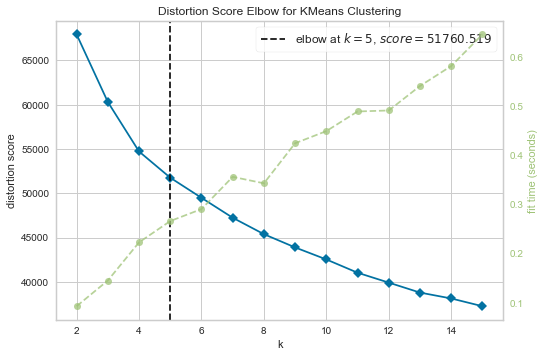

In [31]:
# Model 5: K Means
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# visualization of distortion score of KMeans clustering
def elbow(df, k = 7):
    model = KElbowVisualizer(KMeans(), k = k)
    model.fit(df)
    model.show()

elbow(df_model, k = 15)

In [32]:
pca = PCA().fit(df_model)

first_comps = pd.DataFrame(zip(pca.components_[0], 
                               df_model.columns), 
                               columns = ['weights', 'features'])
first_comps['abs_weights'] = np.abs(first_comps['weights'])
first_comps.sort_values('abs_weights', ascending = False)

,weights,features,abs_weights
2,-0.507497,Ever_Married,0.507497
3,-0.451493,Age,0.451493
9,0.408109,Segmentation,0.408109
7,0.402441,Spending_Score,0.402441
4,-0.319818,Graduated,0.319818
5,0.238715,Profession,0.238715
8,0.202591,Family_Size,0.202591
6,0.089321,Work_Experience,0.089321
1,-0.040323,Gender,0.040323
0,-0.013180,ID,0.013180


Silhouette Score:  0.16961948606350602


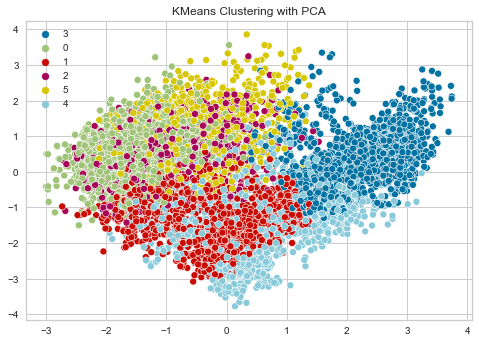

In [33]:
# KMeans with PCA
cust_pca = PCA(n_components = 0.99).fit_transform(df_model)

kmeans = KMeans(n_clusters = 6).fit(cust_pca)
hue = [str(i) for i in kmeans.labels_]
print('Silhouette Score: ', silhouette_score(cust_pca, kmeans.labels_))
sns.scatterplot(x = cust_pca[:, 0], 
                y = cust_pca[:, 1], 
                hue = hue)
plt.title('KMeans Clustering with PCA')
plt.show()

Silhouette Score:  0.16966198513052666


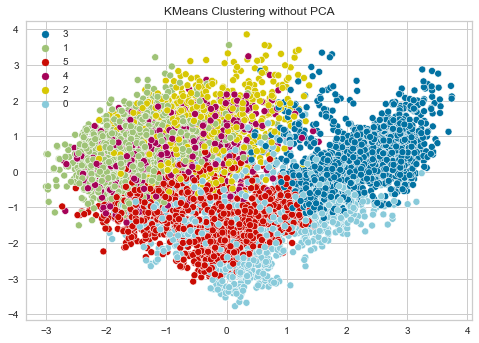

In [34]:
# KMeans without PCA - 6 clusters
kmeans = KMeans(n_clusters = 6).fit(df_model)
hue = [str(i) for i in kmeans.labels_]
print('Silhouette Score: ', silhouette_score(cust_pca, kmeans.labels_))
sns.scatterplot(x = cust_pca[:, 0], 
                y = cust_pca[:, 1], 
                hue = hue)
plt.title('KMeans Clustering without PCA')
plt.show()

Silhouette Score:  0.10277672057113534


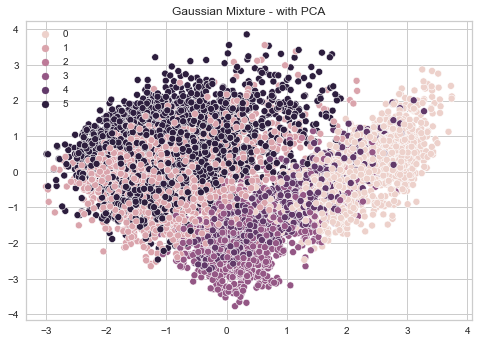

In [42]:
# Model 6: Gaussian Mixture
from sklearn.mixture import GaussianMixture

# with PCA
gm = GaussianMixture(6)
gm.fit(cust_pca)
labels = gm.predict(cust_pca)
print('Silhouette Score: ', silhouette_score(cust_pca, labels))
sns.scatterplot(x = cust_pca[:, 0], 
                y = cust_pca[:, 1], 
                hue = labels)
plt.title('Gaussian Mixture - with PCA')
plt.show()

Silhouette Score:  0.18340509725458004


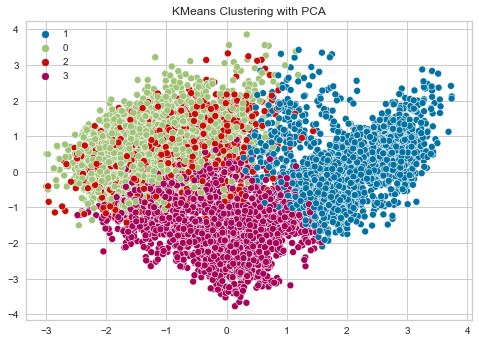

In [36]:
# KMeans with PCA - 4 clusters
cust_pca = PCA(n_components = 0.99).fit_transform(df_model)

kmeans = KMeans(n_clusters = 4).fit(cust_pca)
hue = [str(i) for i in kmeans.labels_]
print('Silhouette Score: ', silhouette_score(cust_pca, kmeans.labels_))
sns.scatterplot(x = cust_pca[:, 0], 
                y = cust_pca[:, 1], 
                hue = hue)
plt.title('KMeans Clustering with PCA')
plt.show()

Silhouette Score:  0.18340509725458004


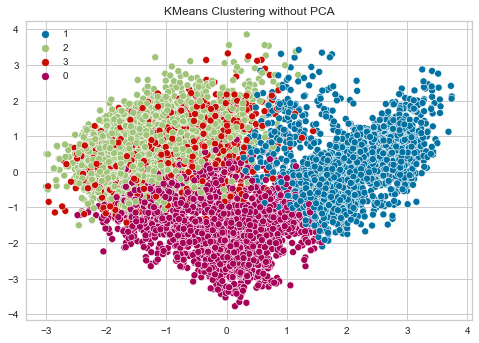

In [37]:
# KMeans without PCA - 4 clusters
kmeans = KMeans(n_clusters = 4).fit(df_model)
hue = [str(i) for i in kmeans.labels_]
print('Silhouette Score: ', silhouette_score(cust_pca, kmeans.labels_))
sns.scatterplot(x = cust_pca[:, 0], 
                y = cust_pca[:, 1], 
                hue = hue)
plt.title('KMeans Clustering without PCA')
plt.show()

Silhouette Score:  0.08339868648222354


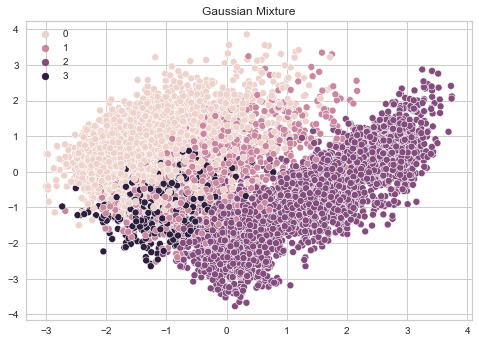

In [38]:
# Gaussian with PCA - 4 clusters
gm = GaussianMixture(4)
gm.fit(cust_pca)
labels = gm.predict(cust_pca)
print('Silhouette Score: ', silhouette_score(cust_pca, labels))
sns.scatterplot(x = cust_pca[:, 0], 
                y = cust_pca[:, 1], 
                hue = labels)
plt.title('Gaussian Mixture')
plt.show()

Silhouette Score:  0.14660991853090502


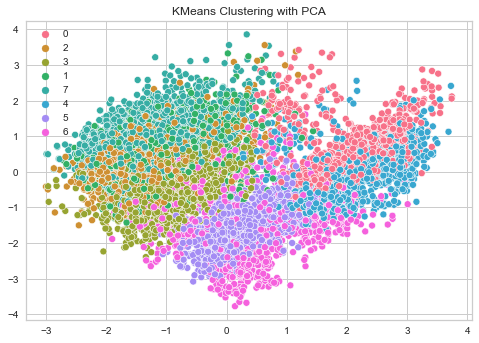

In [39]:
# KMeans with PCA - 8 clusters
cust_pca = PCA(n_components = 0.99).fit_transform(df_model)

kmeans = KMeans(n_clusters = 8).fit(cust_pca)
hue = [str(i) for i in kmeans.labels_]
print('Silhouette Score: ', silhouette_score(cust_pca, kmeans.labels_))
sns.scatterplot(x = cust_pca[:, 0], 
                y = cust_pca[:, 1], 
                hue = hue)
plt.title('KMeans Clustering with PCA')
plt.show()

Silhouette Score:  0.14735199205417393


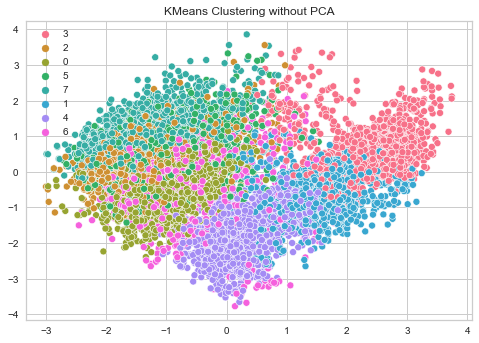

In [40]:
# KMeans without PCA - 8 clusters
kmeans = KMeans(n_clusters = 8).fit(df_model)
hue = [str(i) for i in kmeans.labels_]
print('Silhouette Score: ', silhouette_score(cust_pca, kmeans.labels_))
sns.scatterplot(x = cust_pca[:, 0], 
                y = cust_pca[:, 1], 
                hue = hue)
plt.title('KMeans Clustering without PCA')
plt.show()

Silhouette Score:  0.08007860655428567


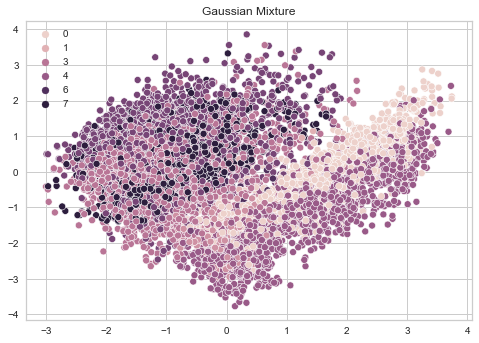

In [41]:
# Gaussian with PCA - 8 clusters
gm = GaussianMixture(8)
gm.fit(cust_pca)
labels = gm.predict(cust_pca)
print('Silhouette Score: ', silhouette_score(cust_pca, labels))
sns.scatterplot(x = cust_pca[:, 0], 
                y = cust_pca[:, 1], 
                hue = labels)
plt.title('Gaussian Mixture')
plt.show()